In [2]:
from spectrogram import Spectrogram

import matplotlib.pyplot as plt
import numpy as np


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [3]:
spec = Spectrogram("../dig/GEN1_CHAN1TEK001.dig")

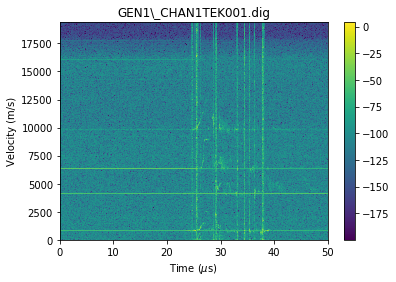

In [41]:
spec.plot()
plt.savefig('books_read.png')

In [32]:
def find_nearest(array, value):
    value = value
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

find_nearest(spec.time,40e-6)

388

In [37]:
lowerTime = find_nearest(spec.time, 20e-6)
upperTime = find_nearest(spec.time, 40e-6)

times, velocities, intensities = spec.slice((spec.time[lowerTime],spec.time[upperTime]),(0,18000))

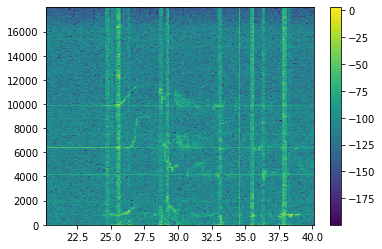

In [38]:
plt.pcolormesh(times*1e6,velocities,intensities)
plt.colorbar()

In [7]:
def thresholdDenoise(threshold,ins):
    newIntensities = ins.copy()
    with np.nditer(newIntensities, op_flags=['readwrite']) as it:
        for element in it:
            if element < threshold:
                element[...] = -70
    plt.pcolormesh(times*1e6,velocities,newIntensities)
    plt.colorbar()

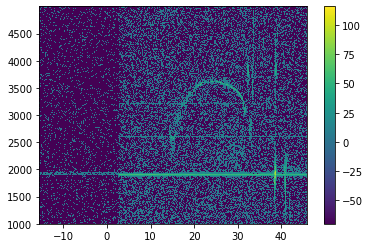

In [7]:
thresholdDenoise(0,intensities)

In [ ]:
def makeDenoised(item,threshold):
    if item < threshold:
        return -70
    else:
        return item

vfunc = np.vectorize(makeDenoised)


def thresholdDenoiseVectorized(threshold,ins):
#     newIntensities = ins.copy()
#     with np.nditer(newIntensities, op_flags=['readwrite']) as it:
#         for element in it:
#             if element < threshold:
#                 element[...] = -70
    newIntensities = vfunc(ins,threshold)
    plt.pcolormesh(times*1e6,velocities,newIntensities)
    plt.colorbar()

In [39]:
interact_manual(thresholdDenoise,threshold=widgets.IntSlider(min=-75, max=75, step=5),ins=(fixed(intensities)));

interactive(children=(IntSlider(value=0, description='threshold', max=75, min=-75, step=5), Button(description…

In [ ]:
def thresholdDecayDenoise(threshold,ins):
    newIntensities = ins.copy()
    with np.nditer(newIntensities, op_flags=['readwrite']) as it:
        for element in it:
            if element < threshold:
                element[...] 
    plt.pcolormesh(times*1e6,velocities,newIntensities)
    plt.colorbar()